In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [2]:
titanic_csv = pd.read_csv('titanic_train.csv')

In [3]:
titanic_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(str(len(titanic_csv.index)))

891


# Analyzing data

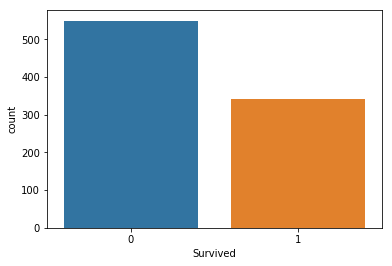

In [5]:
sns.countplot(x='Survived', data=titanic_csv)

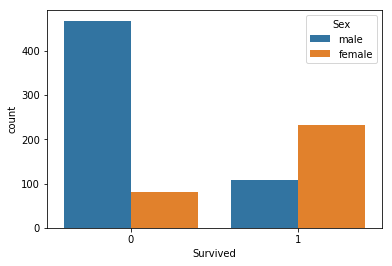

In [6]:
sns.countplot(x='Survived', hue='Sex', data=titanic_csv)

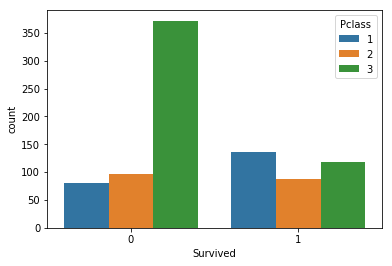

In [7]:
sns.countplot(x='Survived', hue="Pclass", data=titanic_csv)

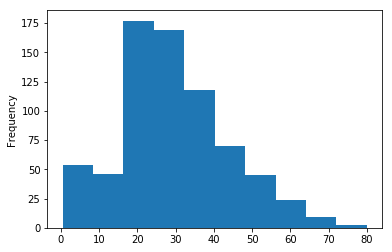

In [8]:
titanic_csv['Age'].plot.hist()

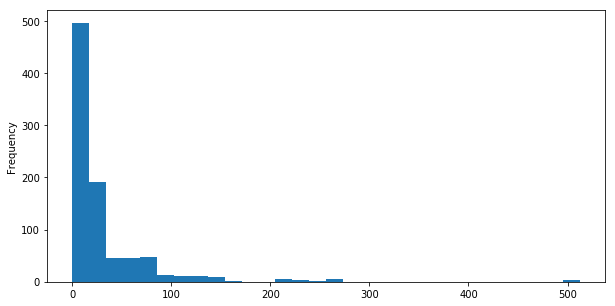

In [9]:
titanic_csv["Fare"].plot.hist(bins=30, figsize=(10, 5))

In [10]:
titanic_csv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


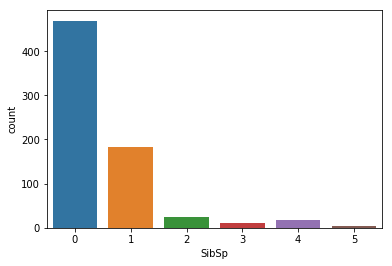

In [50]:
sns.countplot(x='SibSp', data=titanic_csv)

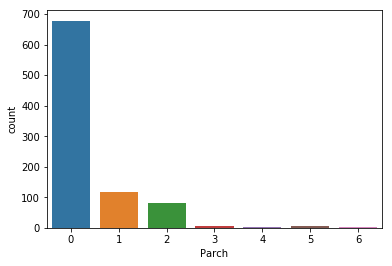

In [12]:
sns.countplot(x='Parch', data=titanic_csv)

# Data Wrangling

In [13]:
titanic_csv.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [14]:
titanic_csv.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

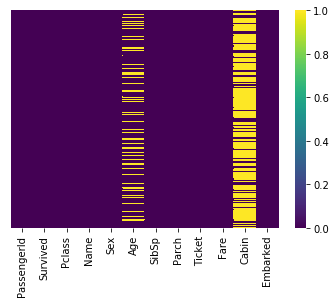

In [15]:
sns.heatmap(data=titanic_csv.isnull(), cmap='viridis', yticklabels=False)

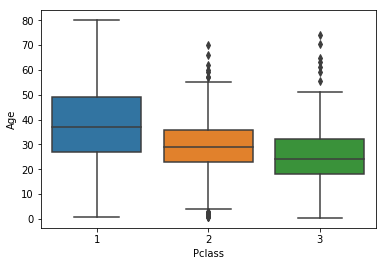

In [16]:
sns.boxplot(x='Pclass', y='Age', data=titanic_csv)

In [17]:
titanic_csv.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [18]:
titanic_csv.drop('Cabin', axis=1, inplace=True)

In [19]:
titanic_csv.dropna(inplace=True)

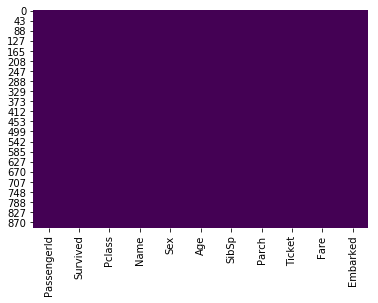

In [20]:
sns.heatmap(titanic_csv.isnull(), cbar=False, cmap='viridis')

In [21]:
        titanic_csv.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
pcl = pd.get_dummies(titanic_csv['Pclass'], drop_first=True)

In [23]:
sex = pd.get_dummies(data=titanic_csv['Sex'], drop_first=True)

In [24]:
embark = pd.get_dummies(data=titanic_csv['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
titanic_csv = pd.concat([titanic_csv, embark, sex, pcl], axis=1)

In [26]:
titanic_csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S,male,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,1,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0,1,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,1,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,0,0,1,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,0,1,0,0,1


In [27]:
titanic_csv.drop(['Pclass', 'Embarked', 'PassengerId', 'Ticket', 'Name', 'Sex'], axis=1, inplace=True)

In [43]:
titanic_csv.to_csv('titanic_cleaned_data.csv')

In [28]:
titanic_csv.head()

,Survived,Age,SibSp,Parch,Fare,Q,S,male,2,3
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,1,0,0,0
4,0,35.0,0,0,8.0500,0,1,1,0,1


# Train. Data`

In [29]:
X = titanic_csv.drop('Survived',axis=1)
y= titanic_csv['Survived']

In [30]:
from sklearn.cross_validation import train_test_split

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel= LogisticRegression()

In [34]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
PREDICTION = logmodel.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

In [37]:
cr = classification_report(y_test, PREDICTION)

In [38]:
print(cr)

             precision    recall  f1-score   support

          0       0.81      0.83      0.82       126
          1       0.75      0.72      0.73        88

avg / total       0.78      0.79      0.78       214



In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
print(confusion_matrix(y_test, PREDICTION))

[[105  21]
 [ 25  63]]


In [41]:
from sklearn.metrics import accuracy_score


In [44]:
test = pd.read_csv('titanic_test.csv')

In [42]:
accuracy_score(y_test, PREDICTION)*100

78.50467289719626

In [52]:
len(titanic_csv)

712

In [53]:
len(PREDICTION)

214